,sum_sq,df,F,PR(>F)
treatments,23.4375,2.0,1.692708,0.222156
Residual,90.0000,13.0,NaN,NaN


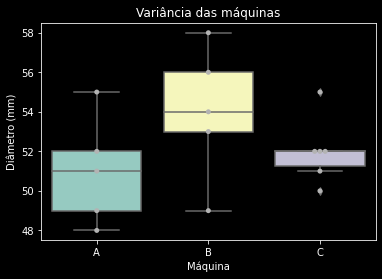

<Figure size 432x288 with 0 Axes>

In [28]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

# dados
data = {"A": {0: 49, 1: 55, 2: 51, 3: 52, 4: 48}, "B": {
    0: 53, 1: 54, 2: 58, 3: 49, 4: 56}, "C": {0: 55, 1: 51, 2: 52, 3: 52, 4: 52, 5: 50}}
df = pd.DataFrame(data)

df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C'])

df_melt.columns = ['index', 'treatments', 'value']

ax = sns.boxplot(data=df)
ax = sns.swarmplot(data=df, color=".7")
ax.title.set_text('Variância das máquinas')
ax.set_xlabel('Máquina')
ax.set_ylabel('Diâmetro (mm)')

plt.figure()

#Obter tabela com valores da anova
model = ols('value ~ treatments', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
